In [2]:
import numpy as np
from features_funcs import pure_landmarks, fwhr
from get_features import get_labelled_landmarks, get_features
from utils import facing_straight, labels_to_col_nr, normalize_by_eyes, unroll
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# def get_faces(file, labels_file, face_id_clean=False, limit_deg=1):
#     features = {}
#     col_nr, labels = labels_to_col_nr(labels_file)
#     with open(file, 'r') as data_file:
#         for row in data_file:
#             data = row.split(',')
#             face_id, labelled_data, ok = get_labelled_landmarks(
#                 data, col_nr, labels, face_id_clean=face_id_clean, limit_deg=limit_deg)
#             if not ok:
#                 continue
#             labelled_data = unroll(
#                 labelled_data, np.float(data[col_nr['headpose.roll_angle']]))
#             labelled_data = normalize_by_eyes(labelled_data)
#             features[face_id] = pure_landmarks(labelled_data)
#     return features

# faces = get_faces("../data/data.csv", "../data/data_labels.txt", face_id_clean=False, limit_deg=1)
# np.save('../data/faces', faces)


In [3]:
faces = np.load('../data/faces.npy')
faces = faces[np.asarray(faces) is not None][0]

In [5]:
manual_fwhr = pd.read_csv('../data/manual_fwhr.csv', engine='c')
faceid = manual_fwhr['md5']
faceid = list(set(faces.keys()).intersection(faceid))
print(len(faceid))
faceid = faceid[1]
face = faces[faceid][0]
faceid

34


'5eada737163b3cd6061b8409e2895b4a'

In [6]:
face = np.array(list(zip(face[::2], face[1::2])))
face = face[face[:,0].argsort()]
face_x = face[:, 0]
face_y = face[:, 1]

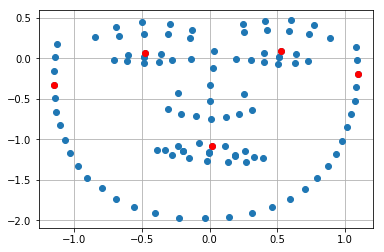

1.9322668639636071


In [22]:
# find the points for fwhr manually
plt.plot(face_x, face_y, 'o')
plt.plot(face_x[0], face_y[0], 'ro')
plt.plot(face_x[-1], face_y[-1], 'ro')
lip_top = 55
eye_lid_left = 25
eye_lid_right = 84
plt.plot(face_x[lip_top], face_y[lip_top], 'ro')
plt.plot(face_x[eye_lid_left], face_y[eye_lid_left], 'ro')
plt.plot(face_x[eye_lid_right], face_y[eye_lid_right], 'ro')
plt.grid()
plt.show()
width = np.abs(face_x[0] - face_x[-1]) # difference between landarmks the most to the left and right
# average the y coord of the eye lids and then substract lip top
height = np.abs(np.mean((face_y[eye_lid_left], face_y[eye_lid_right])) - face_y[lip_top])
print(width / height)

In [23]:
#### fwhr from Michal
manual_fwhr.set_index('md5').loc[faceid, 'mfwhr']

1.69546437488853

In [3]:
# auto_fwhr = get_features("../data/data.csv", fwhr, "../data/data_labels.txt", "../data/gender.csv", face_id_clean=False, limit_deg=1)
# np.save('../data/auto_fwhr_widest.npy', auto_fwhr)

In [24]:
# automated fwhr by a script
auto_fwhr = np.load('../data/auto_fwhr_widest.npy')
# auto_fwhr = np.load('../data/auto_fwhr.npy')
auto_fwhr = auto_fwhr[np.asarray(auto_fwhr) is not None][0]

In [25]:
auto_fwhr[faceid][0]

1.9322668639636071

0.9110814651216121 1.5070967390969692
0.23680248907507706 1.139668218679408
0.2671701872694987 1.1129529017941409
0.09334481483306312 1.0491696157559938
0.2029638455989089 1.1119085913193727
-0.032965828498038974 0.98248806061448
0.31949408916277044 1.1815552337272777
0.33463628889422226 1.194302607859105
0.2355493823710315 1.1486855316524303
0.35288768529411807 1.198241196420103
0.17779097804154675 1.088904735122472
0.4541259012671153 1.2383484116849395
0.17336652070885195 1.1083280007494298
0.3748169513627495 1.2183852781614544
0.12082638161636705 1.0571785646395986
0.7253402628054229 1.352308127648349
0.08175647032950506 1.0411388541085997
0.2417217289608926 1.1178301797097039
0.10771180523748591 1.065299529767693
0.1604610162096689 1.0871958656208507
0.643063819606952 1.4113521152699866
0.20523799253197517 1.1186450326104678
0.1642648309055179 1.0826730885079265
0.650590482925929 1.374935988297878
0.2788414700251325 1.1585454753784084
-0.04995098402519216 0.9751217556965996
0.30462

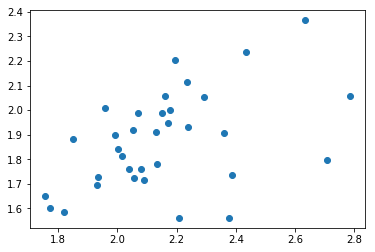

In [26]:
# correlation between auto and manual 
ids = manual_fwhr['md5']
ids = list(set(faces.keys()).intersection(ids))
autos = []
manuals = []
for ii in ids:
    print(
    auto_fwhr[ii][0] - manual_fwhr.set_index('md5').loc[ii, 'mfwhr'],  auto_fwhr[ii][0] / manual_fwhr.set_index('md5').loc[ii, 'mfwhr']
    )
    autos.append(auto_fwhr[ii][0])
    manuals.append(manual_fwhr.set_index('md5').loc[ii, 'mfwhr'])
plt.plot(autos, manuals, 'o')
plt.show()